<h2 align="center">Predicting Airline Passenger Satisfaction Using Machine Learning: A Data-Driven Approach to Enhancing Customer Experience</h1>
<hr>

### Objective:

* Improve overall customer experience by identifying pain points 
* Predict customer satisfaction to proactively address service gaps. 
* Segment customers based on their likelihood of satisfaction for targeted service improvements 

**Submission by:-** Latha Reddy

<hr>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading & Reading the Airlines data

In [3]:
# Load the dataset and store it in pandas dataframe variable
airlines_df = pd.read_csv('Data.csv')
airlines_df.head() # Displays the top 5 records

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
# shape gives the information about how many rows and how many columns are exist in the dataseta
rows, cols = airlines_df.shape
print(f'The dataset is having {rows} rows and {cols} columns')

The dataset is having 129880 rows and 24 columns


In [5]:
# info() gives the information about the column and Null values 
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
# Import the regular expressions module
import re

# Define the regular expression pattern
pattern = r'[^\d]'

# Use regex substitution to remove special characters from the 'Flight Distance' column
airlines_df['Flight Distance'] = airlines_df['Flight Distance'].apply(lambda x: re.sub(pattern, '', str(x)))

In [7]:
# Changing the data type of Flight Distance from object to int
airlines_df['Flight Distance'] = airlines_df['Flight Distance'].astype('int64')

In [8]:
# After removing the special characters from the 'Flight Distance' column 
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [9]:
# describe - gives the 5 point summary of data of numeric colums
airlines_df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Checking For Null Values

In [10]:
# Missing values
airlines_df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [11]:
airlines_df['Arrival Delay'] = airlines_df['Arrival Delay'].fillna(0)

In [12]:
airlines_df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

#### Checking for duplicates

In [13]:
# Duplicates
print(f'The data has {airlines_df.duplicated().sum()} duplicate records')

The data has 0 duplicate records


#### Dropping the features which is not useful for the data analysis

In [14]:
# ID is unique value, for data analysis this column is not useful.
airlines_df.drop(['ID'],axis=1,inplace=True)
airlines_df.head(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


#### Categorizing numeric columns and categorical columns

In [15]:
# categorize the features depending on their datatype (int, float, object, bool) and then calculate the number of them. 

# Categorical columns
categorical_cols = [col for col in airlines_df.columns if airlines_df[col].dtype == 'object' or airlines_df[col].dtype == 'bool']
print('Categorical columns :',categorical_cols)
print()

# Numerical columns
numerical_cols = [col for col in airlines_df.columns if airlines_df[col].dtype != 'object']
print('Numerical columns :',numerical_cols)
print()
print('The data has {0} Categorical columns and {1} Numerical columns'.format(len(categorical_cols), len(numerical_cols)))

Categorical columns : ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

Numerical columns : ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

The data has 5 Categorical columns and 18 Numerical columns


#### Understanding the numerical data

In [16]:
# Understanding the numerical data

for category in numerical_cols:
    if airlines_df[category].nunique == 1:
        print(f'*** {category} has 1 unique value')
    else:
        print(f'{category} has {airlines_df[category].nunique()} unique values')
        if airlines_df[category].nunique()<10:
            print(set(airlines_df[category].tolist()))
    print()

Age has 75 unique values

Flight Distance has 3821 unique values

Departure Delay has 466 unique values

Arrival Delay has 472 unique values

Departure and Arrival Time Convenience has 6 unique values
{0, 1, 2, 3, 4, 5}

Ease of Online Booking has 6 unique values
{0, 1, 2, 3, 4, 5}

Check-in Service has 6 unique values
{0, 1, 2, 3, 4, 5}

Online Boarding has 6 unique values
{0, 1, 2, 3, 4, 5}

Gate Location has 6 unique values
{0, 1, 2, 3, 4, 5}

On-board Service has 6 unique values
{0, 1, 2, 3, 4, 5}

Seat Comfort has 6 unique values
{0, 1, 2, 3, 4, 5}

Leg Room Service has 6 unique values
{0, 1, 2, 3, 4, 5}

Cleanliness has 6 unique values
{0, 1, 2, 3, 4, 5}

Food and Drink has 6 unique values
{0, 1, 2, 3, 4, 5}

In-flight Service has 6 unique values
{0, 1, 2, 3, 4, 5}

In-flight Wifi Service has 6 unique values
{0, 1, 2, 3, 4, 5}

In-flight Entertainment has 6 unique values
{0, 1, 2, 3, 4, 5}

Baggage Handling has 5 unique values
{1, 2, 3, 4, 5}



#### Understanding the categorical data

In [17]:
# Understanding the categorical data

for category in categorical_cols:
    if airlines_df[category].nunique == 1:
        print(f'*** {category} has 1 unique value')
    else:
        print(f'{category} has {airlines_df[category].nunique()} unique values')
        if airlines_df[category].nunique()<10:
            print(set(airlines_df[category].tolist()))
    print()

Gender has 2 unique values
{'Male', 'Female'}

Customer Type has 2 unique values
{'Returning', 'First-time'}

Type of Travel has 2 unique values
{'Business', 'Personal'}

Class has 3 unique values
{'Economy Plus', 'Business', 'Economy'}

Satisfaction has 2 unique values
{'Satisfied', 'Neutral or Dissatisfied'}



## Exploratory Data Analysis (EDA)
### Analysing the Columns
#### Target Column 'Satisfaction'

In [18]:
# Checking the data balance 
print('----------- Count -----------')
print(airlines_df['Satisfaction'].value_counts())

print()
print('----------- Percent -----------')
print()
print(airlines_df['Satisfaction'].value_counts()/len(airlines_df)*100)

print('\n\nWe have balanced data for model')

----------- Count -----------
Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

----------- Percent -----------

Satisfaction
Neutral or Dissatisfied    56.553742
Satisfied                  43.446258
Name: count, dtype: float64


We have balanced data for model


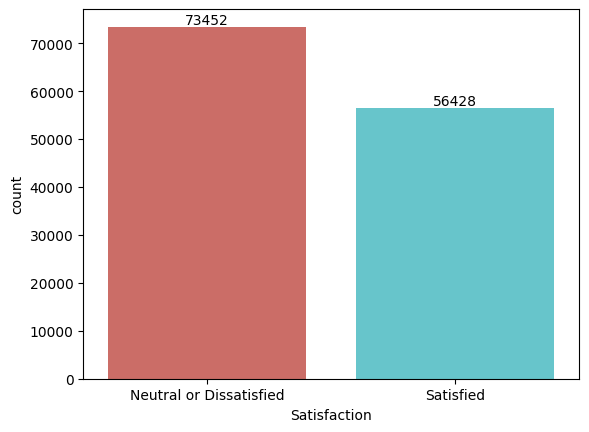

In [19]:
ax = sns.countplot(x='Satisfaction', data=airlines_df, hue='Satisfaction', palette='hls')
for container in ax.containers:
    ax.bar_label(container)

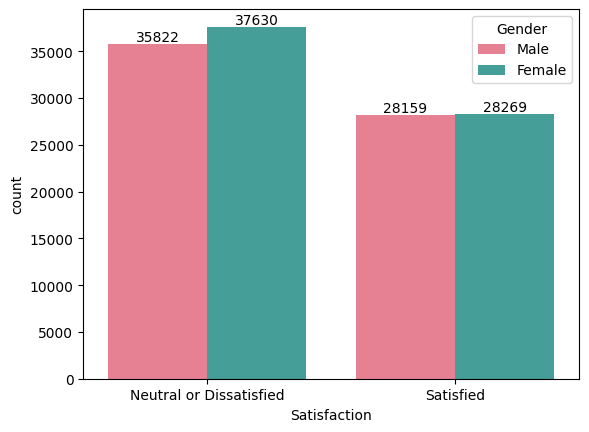

In [20]:
ax = sns.countplot(x='Satisfaction', data=airlines_df, hue='Gender', palette='husl')
for container in ax.containers:
    ax.bar_label(container)

__Observation__: The gender doesn't affect the passengers' satisfaction 

In [21]:
airlines_df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

#### Heatmap between the columns

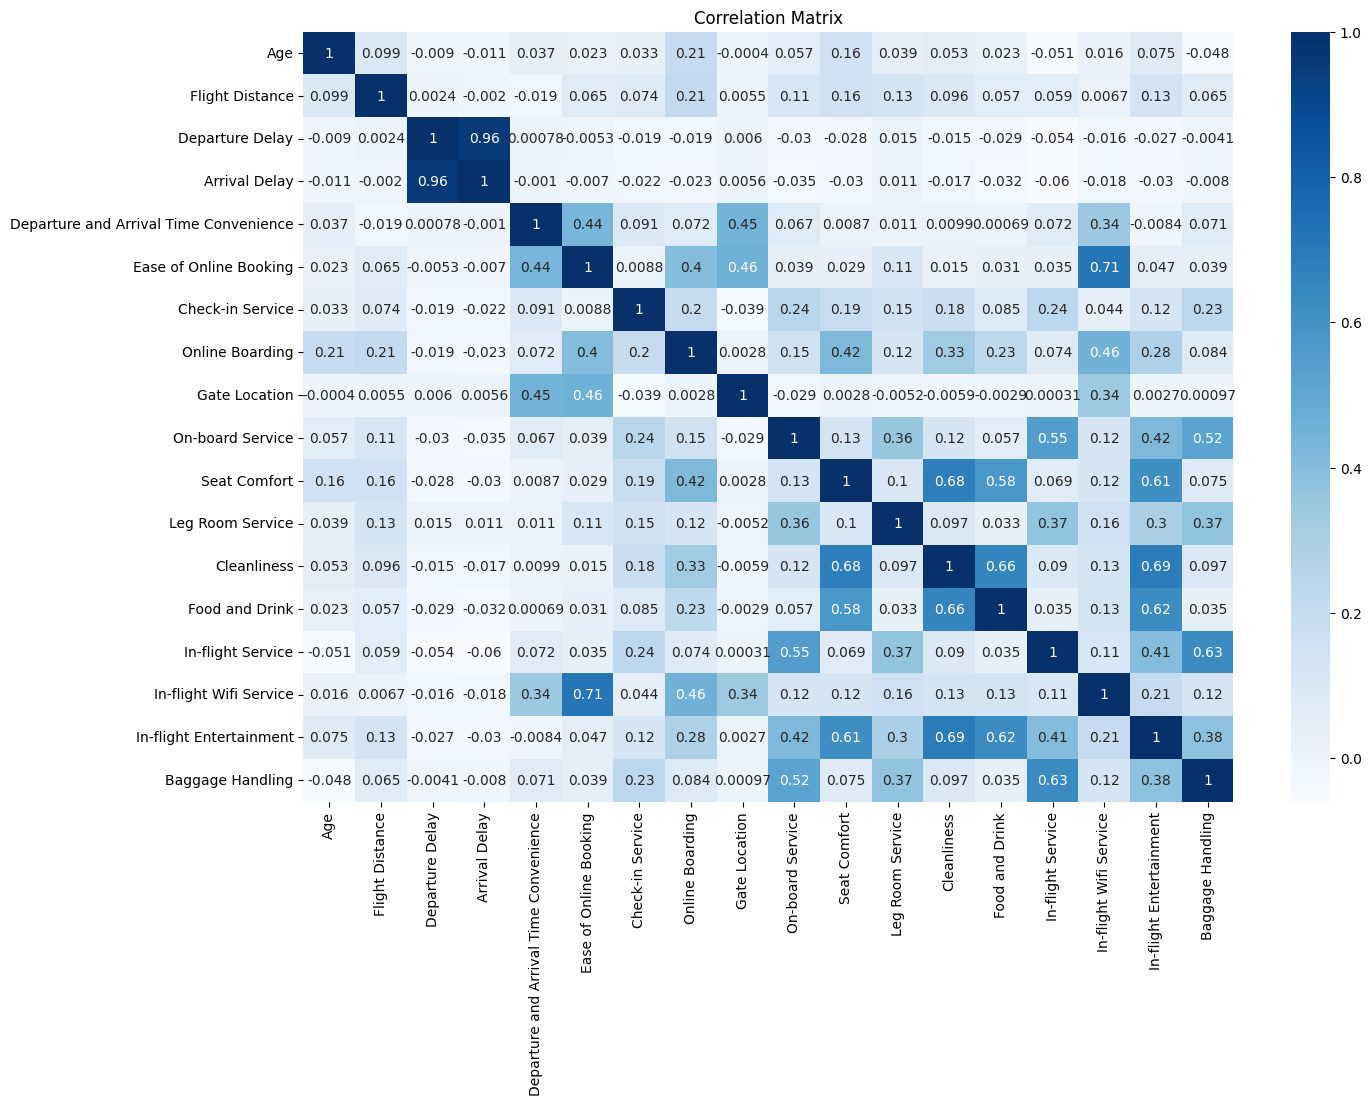

In [22]:
#Correlation heatmap to check relationships between features
plt.figure(figsize=(15,10))
sns.heatmap(airlines_df.corr(numeric_only=True), annot = True, cmap="Blues")
plt.title('Correlation Matrix')
plt.show()

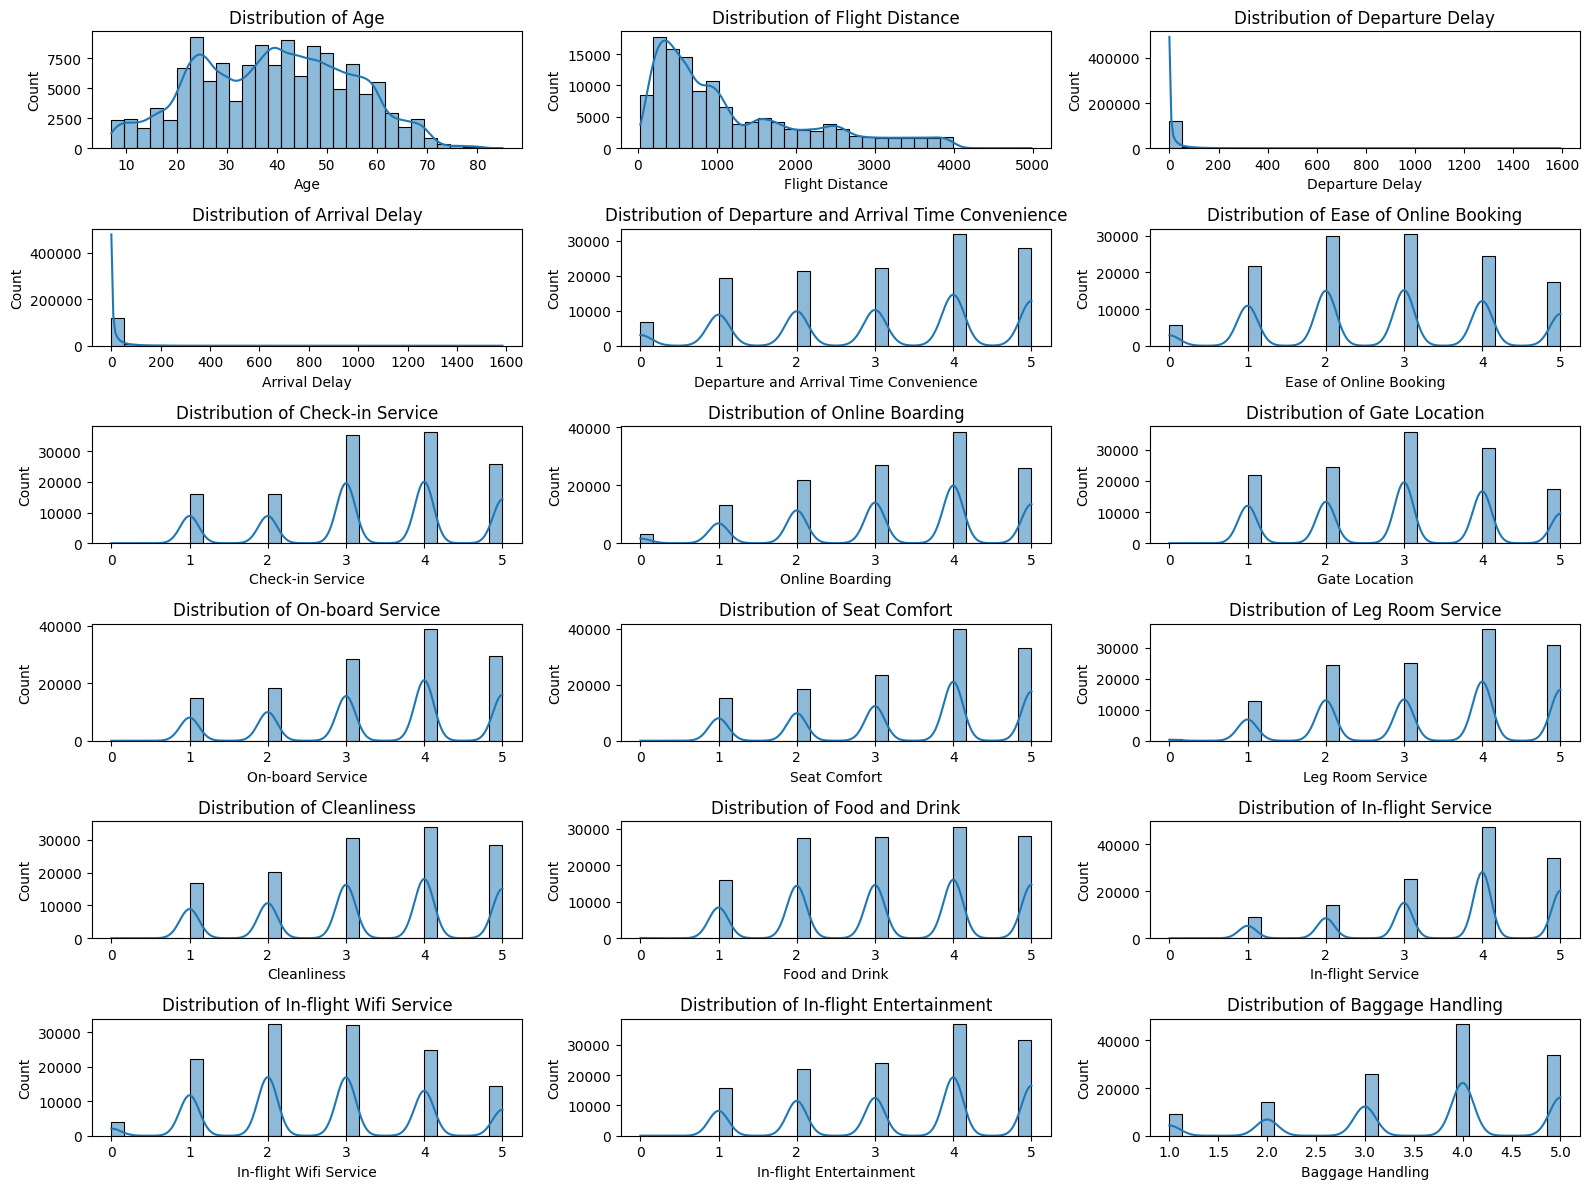

In [23]:
# Create distribution plots with Satisfaction hue
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)  # Adjust grid layout based on number of columns
    sns.histplot(data=airlines_df, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

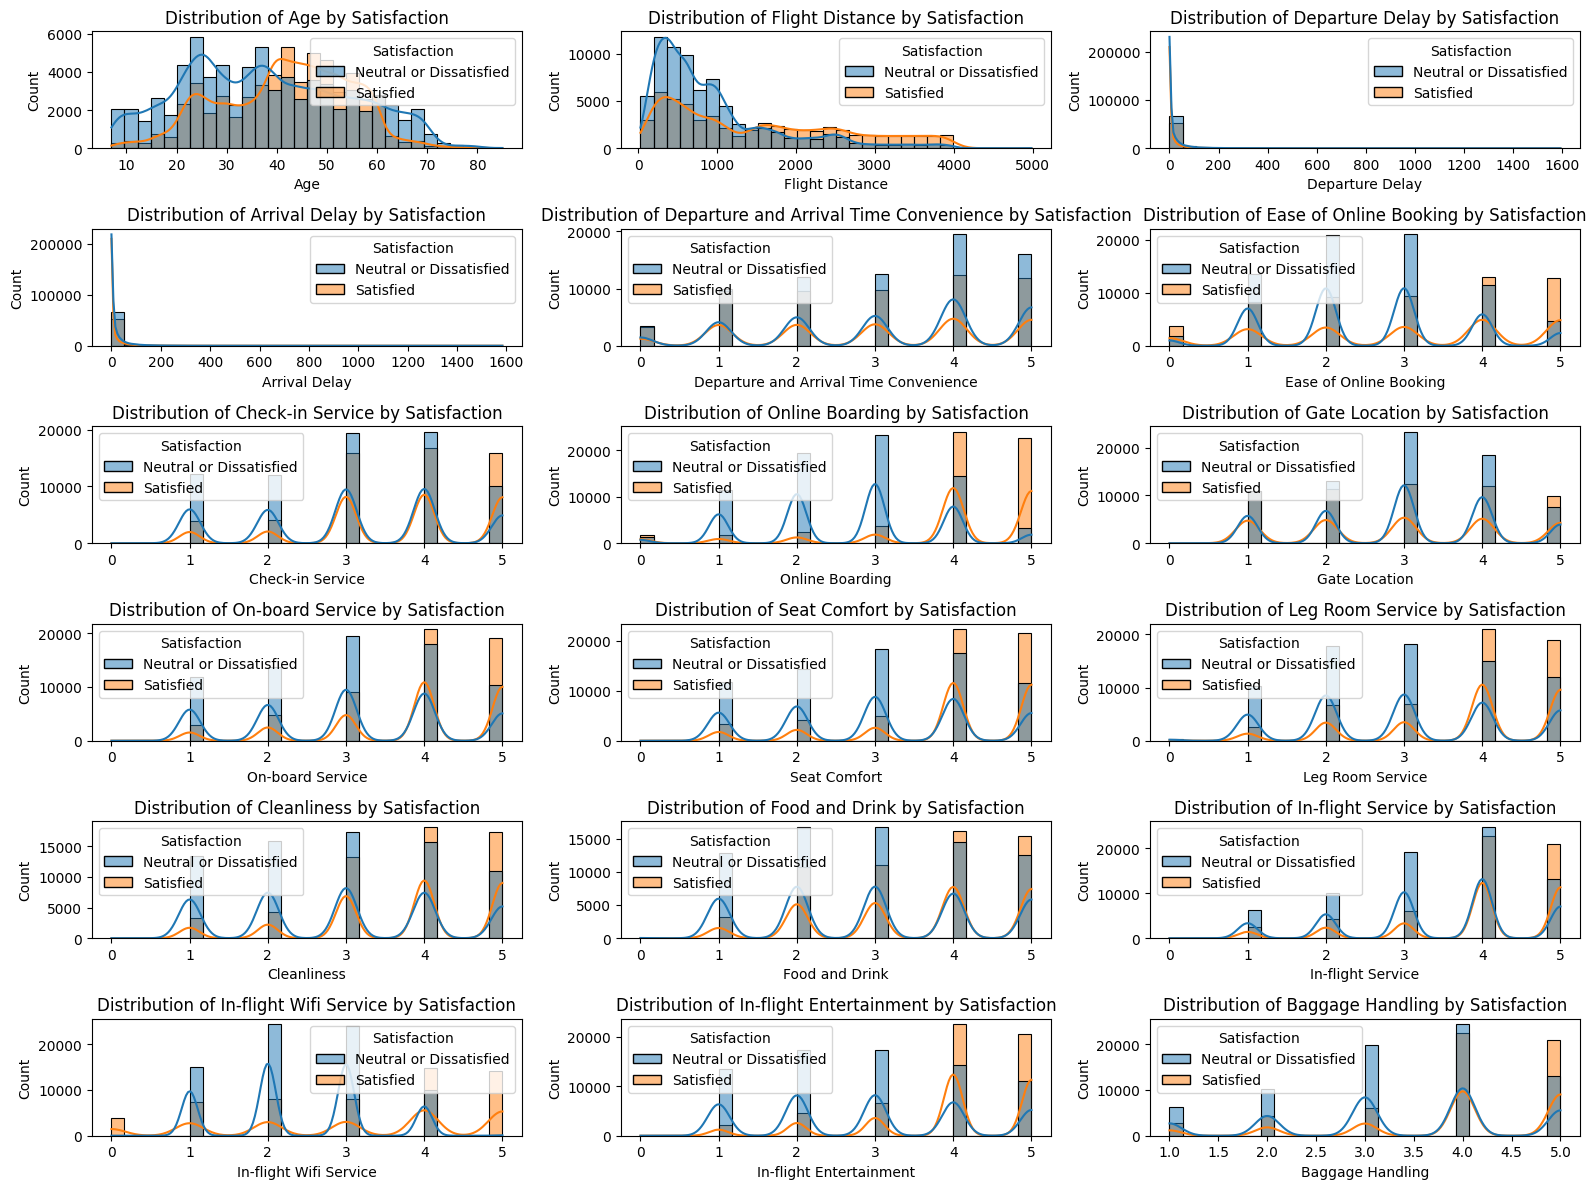

In [24]:
# Create distribution plots with Satisfaction hue
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 3, i+1)  # Adjust grid layout based on number of columns
    sns.histplot(data=airlines_df, x=col, hue="Satisfaction", kde=True, bins=30)
    plt.title(f"Distribution of {col} by Satisfaction")

plt.tight_layout()
plt.show()

__Observation__
- Passengers aged below 38 tend to be more dissatisfied while people aged from 40 to 60 tend to be more satisfied
- Passengers aged between 60 and 70 tend to be more disatsfied
- Flight Distance more than 1500 miles Passengers are satisfied.

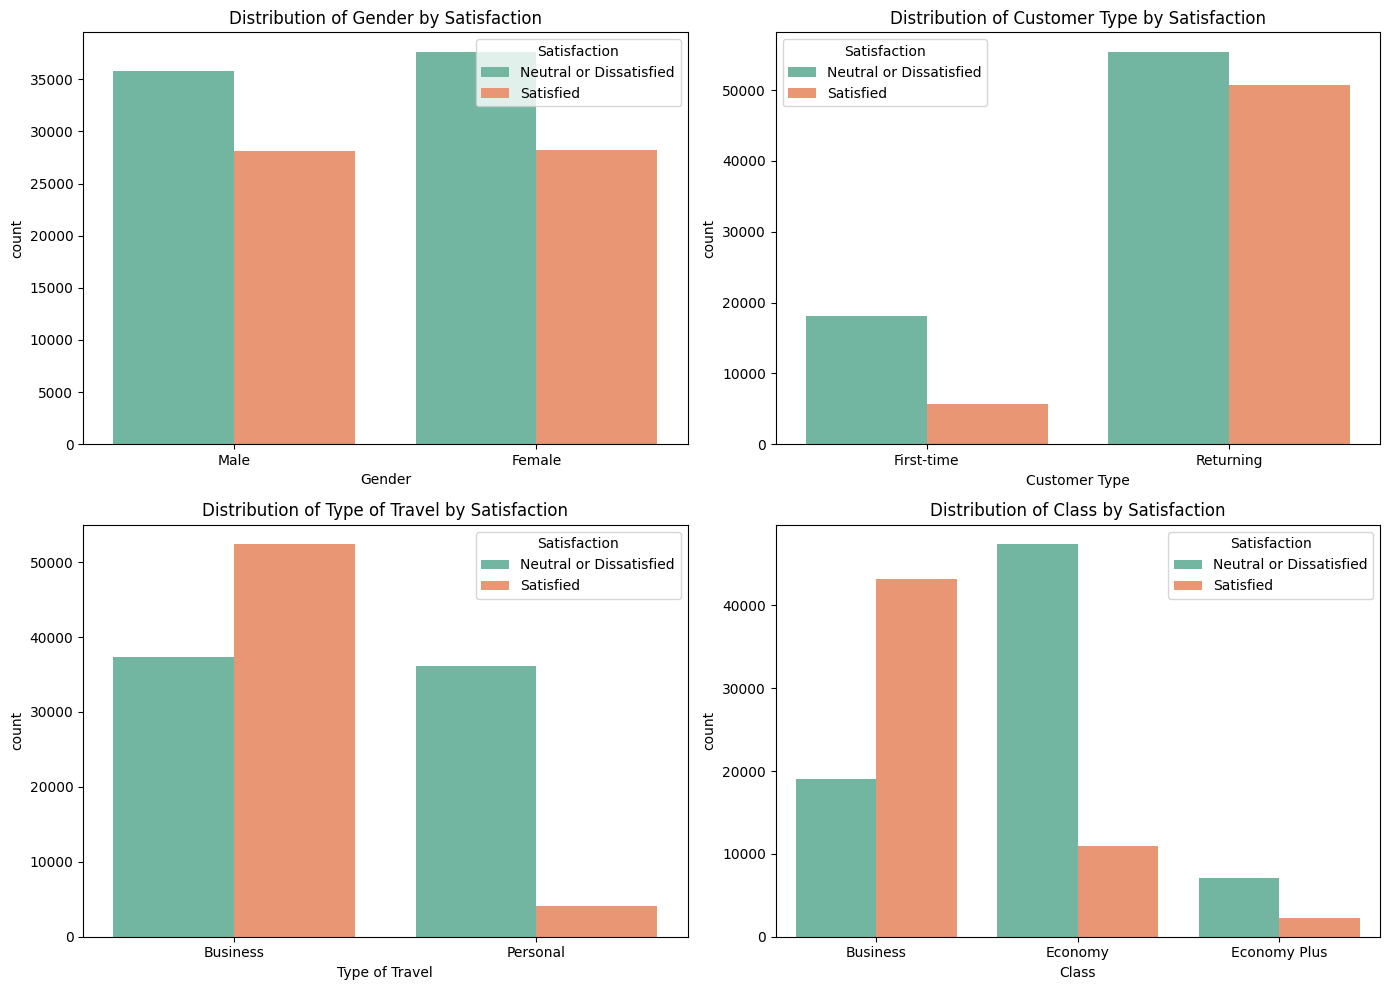

In [25]:
# Create count plots for categorical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols):
    if col != 'Satisfaction':
        plt.subplot(2, 2, i+1)  # Adjust grid layout based on the number of columns
        sns.countplot(data=airlines_df, x=col, hue="Satisfaction", palette="Set2")
        plt.title(f"Distribution of {col} by Satisfaction")

plt.tight_layout()
plt.show()


__Observation__
- More Passengers are Returning Customers
- Business purpose travel passengers are more satisfied than personal travel passengers
- Business class passengers are more satisfied than Economy and Economy Plus passengers

### Count Plot between survey columns

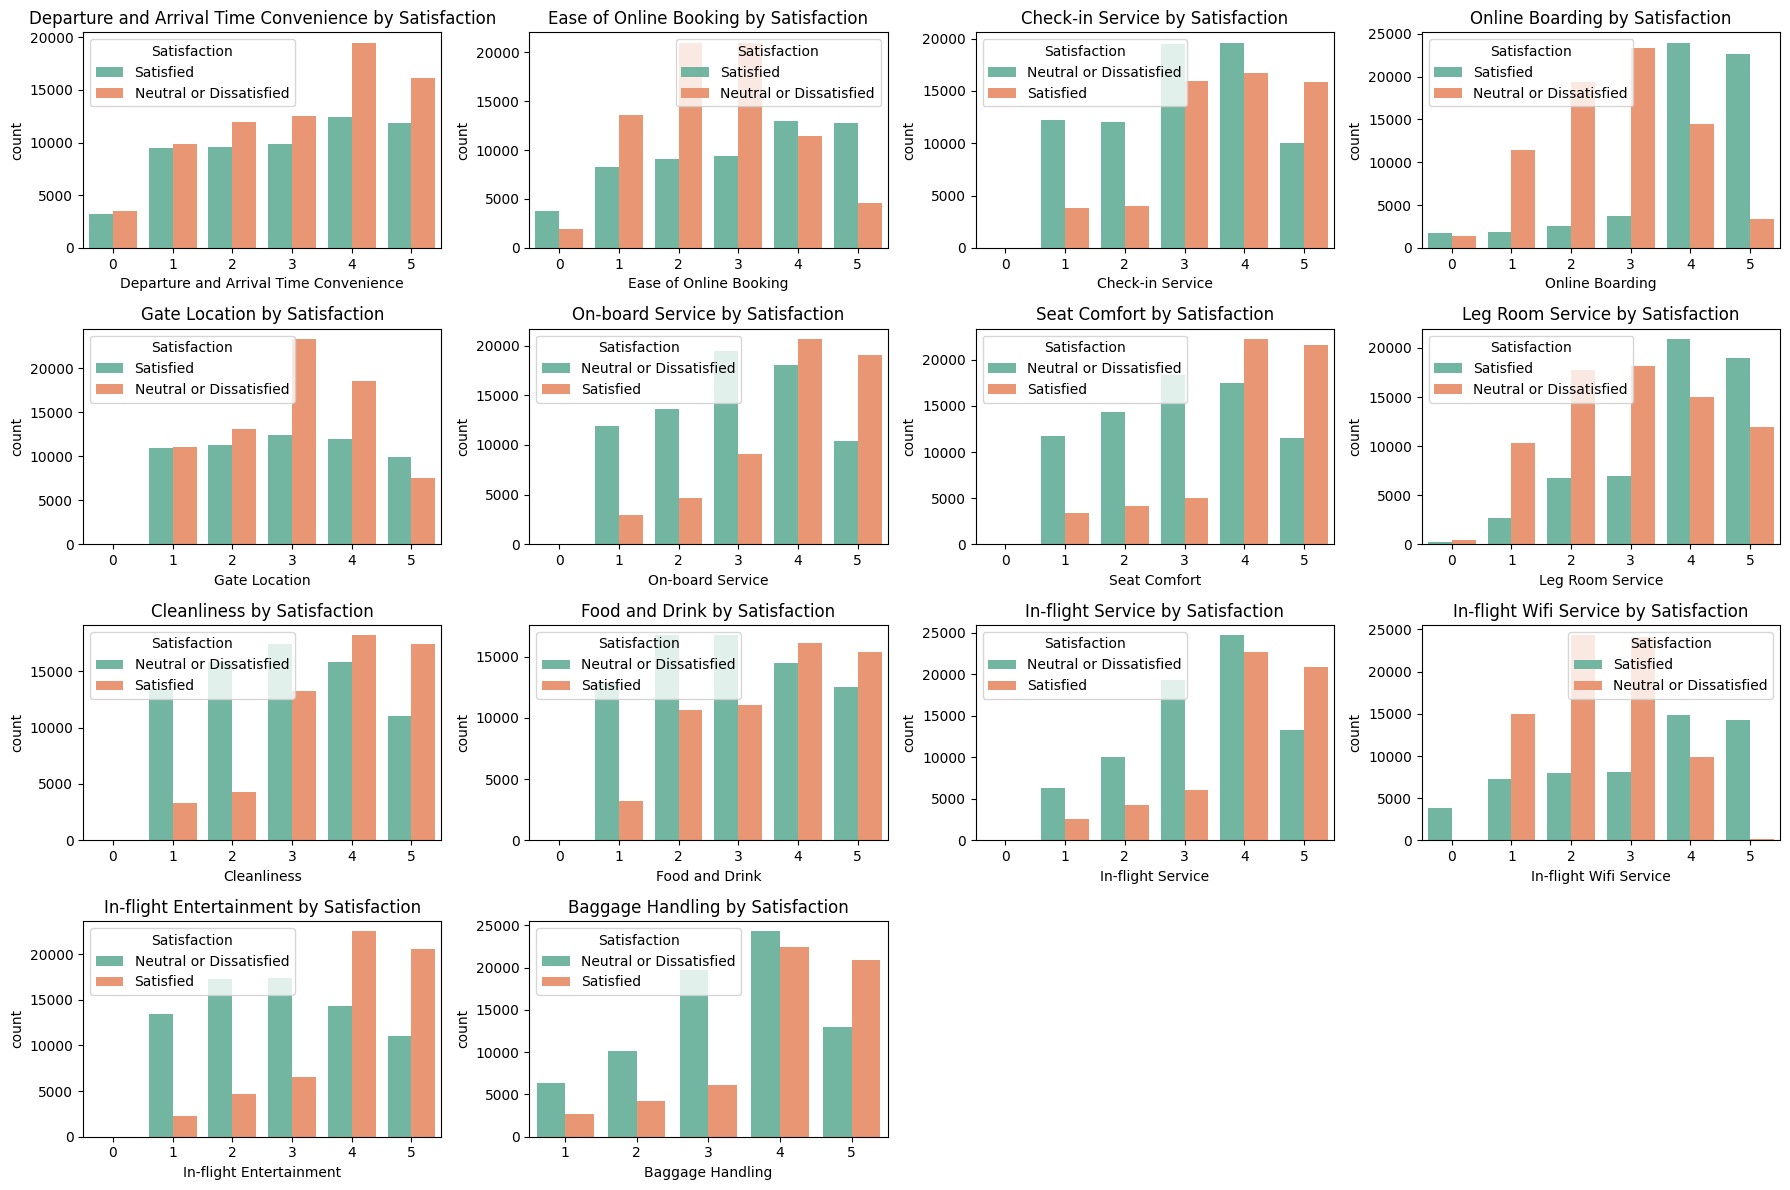

In [26]:
# Define survey columns
survey_cols = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
               'Check-in Service', 'Online Boarding', 'Gate Location',
               'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
               'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
               'In-flight Entertainment', 'Baggage Handling']

# Create count plots for survey columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(survey_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout
    sns.countplot(data=airlines_df, x=col, hue="Satisfaction", palette="Set2")
    plt.title(f"{col} by Satisfaction")

plt.tight_layout()
plt.show()

__Observation__ 
- The more satisfied the passengers with Ease of Online Booking the more satisfied with the airline 

### Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
# List the categorical columns
categorical_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [29]:
# Apply Label Encoding

encoded_df = airlines_df

#Encoding in one go
for col in categorical_cols:
    le = LabelEncoder()  # Create a LabelEncoder object
    encoded_df[col] = le.fit_transform(airlines_df[col])  # Transform column values

encoded_df.head(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


### Splitting the data into train and test

In [30]:
from sklearn.model_selection  import train_test_split

# Define features and target
x = encoded_df.drop('Satisfaction', axis=1)
y = encoded_df['Satisfaction']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [31]:
x_train

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
13345,1,50,1,0,1,631,0,0.0,3,3,...,3,4,4,5,4,4,5,4,4,1
119941,0,30,0,0,1,1009,0,2.0,3,3,...,1,1,5,3,5,5,2,3,5,2
116042,0,30,1,1,1,417,37,24.0,5,3,...,2,3,4,1,4,4,3,3,4,2
5462,0,15,1,1,1,265,0,0.0,5,5,...,1,5,3,5,3,3,4,5,3,4
59309,0,31,1,0,1,2556,4,0.0,1,1,...,1,2,2,3,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40177,0,48,1,0,0,1724,0,0.0,4,4,...,4,4,1,4,4,4,4,4,4,4
19709,0,80,1,0,0,475,2,0.0,4,4,...,4,3,4,3,4,3,3,3,3,3
124294,1,56,1,0,0,255,0,0.0,5,5,...,5,4,4,4,3,3,4,5,4,4
104091,1,30,0,0,1,588,0,0.0,2,4,...,3,1,3,3,4,4,4,4,4,3


In [32]:
x_test

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
113658,0,12,1,1,1,223,13,6.0,3,3,...,4,3,4,4,4,4,4,3,4,3
101701,0,51,1,0,0,1624,3,0.0,4,1,...,4,5,4,4,3,2,5,4,5,5
27530,1,25,1,1,1,605,113,107.0,5,2,...,3,3,1,2,1,1,4,2,1,4
129495,1,7,1,1,0,1744,0,0.0,5,1,...,2,4,2,2,2,2,5,2,2,5
117046,1,24,0,0,1,651,0,0.0,4,4,...,1,4,3,3,2,2,4,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55237,1,75,1,0,0,609,0,1.0,2,2,...,2,4,5,4,5,1,4,2,4,4
73826,1,61,1,1,1,1194,0,0.0,5,1,...,5,4,4,2,4,4,5,1,4,5
25173,1,24,0,0,0,577,11,0.0,0,3,...,4,3,4,5,4,4,5,4,4,4
33950,1,23,1,0,2,1072,0,24.0,5,4,...,4,1,1,3,3,3,3,3,3,4


In [33]:
y_train

13345     1
119941    0
116042    0
5462      1
59309     0
         ..
40177     1
19709     0
124294    1
104091    0
79691     0
Name: Satisfaction, Length: 103904, dtype: int32

In [34]:
y_test

113658    0
101701    1
27530     0
129495    0
117046    0
         ..
55237     1
73826     0
25173     1
33950     0
94457     0
Name: Satisfaction, Length: 25976, dtype: int32

In [35]:
print('The shape of the x_train: ', x_train.shape)
print('The shape of the x_test: ',x_test.shape)
print('--------------------------------------')
print('The shape of the y_train:', y_train.shape)
print('The shape of the y_test:',y_test.shape)

The shape of the x_train:  (103904, 22)
The shape of the x_test:  (25976, 22)
--------------------------------------
The shape of the y_train: (103904,)
The shape of the y_test: (25976,)


### Scaling the data

In [36]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling - to scale/normalise the variables into same scale
# we do it after splitting into train and test - to avoid data leakage 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
x_train_scaled

array([[ 1.01165554,  0.70133399,  0.47325422, ...,  0.95700492,
         0.48288587, -2.23063156],
       [-0.98847875, -0.62051117, -2.11302921, ...,  0.20552451,
         1.23166994, -1.38294327],
       [-0.98847875, -0.62051117,  0.47325422, ...,  0.20552451,
         0.48288587, -1.38294327],
       ...,
       [ 1.01165554,  1.09788754,  0.47325422, ...,  1.70848532,
         0.48288587,  0.31243331],
       [ 1.01165554, -0.62051117, -2.11302921, ...,  0.95700492,
         0.48288587, -0.53525498],
       [ 1.01165554, -0.15786536,  0.47325422, ...,  0.20552451,
        -1.01468225,  0.31243331]])

### Model Selection 

In [38]:
Results = {}

#### 1. Logistic Regression

In [39]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [40]:
def model_evaluation(model):

    # Train the model
    # model.fit(x_train_scaled, y_train)

    # Predict on the train set
    y_train_pred = model.predict(x_train_scaled)

    # Predict on the test set
    y_pred = model.predict(x_test_scaled)

    # Probabilities for ROC-AUC
    y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]  

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display results
    print("<---------------Accuracy Score------------------->")

    print(f"Training Accuracy:: {train_accuracy:.2f}")
    print(f"Testing Accuracy:: {accuracy:.2f}")

    print("\n<-------------------Classification Metrix---------------------->")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}")

    print("\n<-------------------Confusion Matrix---------------------->")
    print("\nConfusion Matrix:\n", conf_matrix)

    print("\n<-------------------Classification Report---------------------->")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Visualize confusion matrix
    sns.heatmap(conf_matrix, fmt='d', annot=True, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Test)")
    plt.show()
    
    # Return metrics as a list
    return [accuracy, precision, recall, f1, roc_auc]


<---------------Accuracy Score------------------->
Training Accuracy:: 0.87
Testing Accuracy:: 0.87

<-------------------Classification Metrix---------------------->
Precision: 0.87
Recall: 0.84
F1 Score: 0.85
ROC-AUC Score: 0.93

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[13216  1464]
 [ 1829  9467]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14680
           1       0.87      0.84      0.85     11296

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



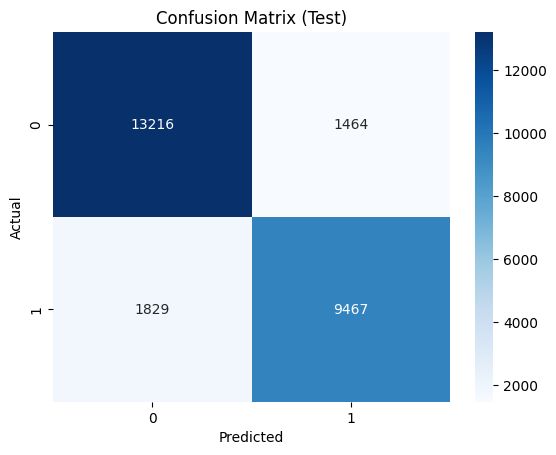

{'Logistic_Regression': [0.8732291345857714,
  0.8660689781355777,
  0.8380842776203966,
  0.8518468529266208,
  0.9269176870981313]}

In [41]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=12)

# Train the model
logistic_model.fit(x_train_scaled, y_train)

Results['Logistic_Regression'] = model_evaluation(logistic_model)
Results

#### 2. Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

<---------------Accuracy Score------------------->
Training Accuracy:: 1.00
Testing Accuracy:: 0.94

<-------------------Classification Metrix---------------------->
Precision: 0.93
Recall: 0.94
F1 Score: 0.94
ROC-AUC Score: 0.94

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[13939   741]
 [  706 10590]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     14680
           1       0.93      0.94      0.94     11296

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



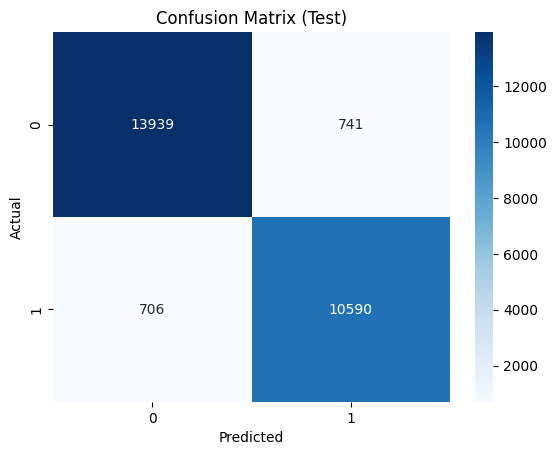

{'Logistic_Regression': [0.8732291345857714,
  0.8660689781355777,
  0.8380842776203966,
  0.8518468529266208,
  0.9269176870981313],
 'Decision_Tree': [0.9442947336002464,
  0.9346041832141911,
  0.9375,
  0.9360498519467892,
  0.9435115803814713]}

In [43]:
#DT Intialization
DT_model = DecisionTreeClassifier(random_state=12)

# Training the model
DT_model.fit(x_train_scaled, y_train)

# Storing the evaluation matrix in Results dictionary
Results['Decision_Tree'] = model_evaluation(DT_model)
Results

#### 3. Random Forest

In [44]:
# importing the RandomForest model
from sklearn.ensemble import RandomForestClassifier

<---------------Accuracy Score------------------->
Training Accuracy:: 1.00
Testing Accuracy:: 0.96

<-------------------Classification Metrix---------------------->
Precision: 0.97
Recall: 0.94
F1 Score: 0.96
ROC-AUC Score: 0.99

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[14385   295]
 [  696 10600]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     14680
           1       0.97      0.94      0.96     11296

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



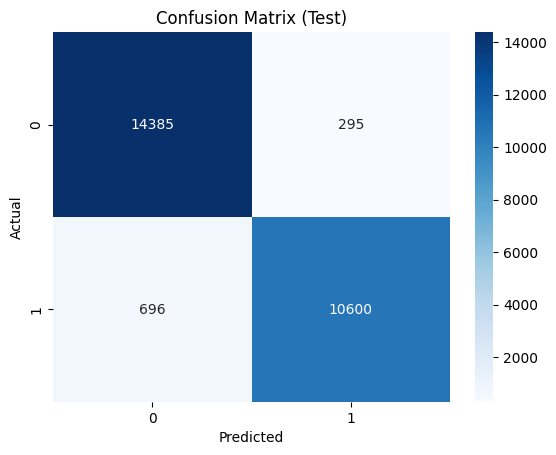

{'Logistic_Regression': [0.8732291345857714,
  0.8660689781355777,
  0.8380842776203966,
  0.8518468529266208,
  0.9269176870981313],
 'Decision_Tree': [0.9442947336002464,
  0.9346041832141911,
  0.9375,
  0.9360498519467892,
  0.9435115803814713],
 'Random_Forest': [0.9618493994456422,
  0.9729233593391464,
  0.9383852691218131,
  0.9553422558694966,
  0.9939368653561145]}

In [45]:
# Initialize the model
RF_model = RandomForestClassifier(random_state=12)

# Train the model with test data
RF_model.fit(x_train_scaled, y_train)

Results['Random_Forest'] = model_evaluation(RF_model)
Results

#### 4. Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

<---------------Accuracy Score------------------->
Training Accuracy:: 0.94
Testing Accuracy:: 0.94

<-------------------Classification Metrix---------------------->
Precision: 0.94
Recall: 0.92
F1 Score: 0.93
ROC-AUC Score: 0.99

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[14025   655]
 [  910 10386]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14680
           1       0.94      0.92      0.93     11296

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



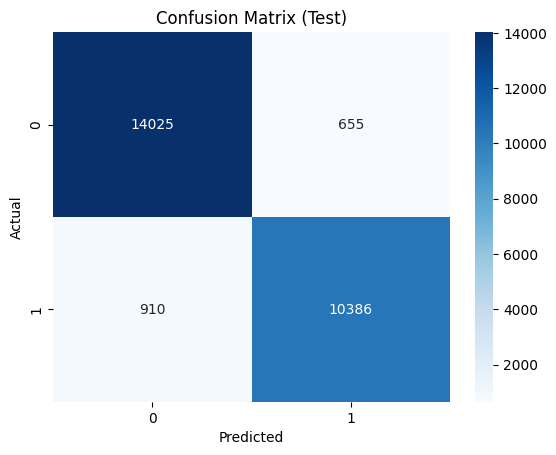

{'Logistic_Regression': [0.8732291345857714,
  0.8660689781355777,
  0.8380842776203966,
  0.8518468529266208,
  0.9269176870981313],
 'Decision_Tree': [0.9442947336002464,
  0.9346041832141911,
  0.9375,
  0.9360498519467892,
  0.9435115803814713],
 'Random_Forest': [0.9618493994456422,
  0.9729233593391464,
  0.9383852691218131,
  0.9553422558694966,
  0.9939368653561145],
 'Gradient_Boosting': [0.939752078842008,
  0.940675663436283,
  0.9194405099150141,
  0.9299368760352777,
  0.9873320370693781]}

In [47]:
# Initialize the Gradient Boosting model
GB_model = GradientBoostingClassifier(random_state=12)

# Train the model 
GB_model.fit(x_train_scaled, y_train)

Results['Gradient_Boosting'] = model_evaluation(GB_model)
Results

### 5.KNN Classifier

In [48]:
# Importing the model
from sklearn.neighbors import KNeighborsClassifier 

<---------------Accuracy Score------------------->
Training Accuracy:: 0.95
Testing Accuracy:: 0.93

<-------------------Classification Metrix---------------------->
Precision: 0.95
Recall: 0.89
F1 Score: 0.92
ROC-AUC Score: 0.97

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[14137   543]
 [ 1295 10001]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     14680
           1       0.95      0.89      0.92     11296

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



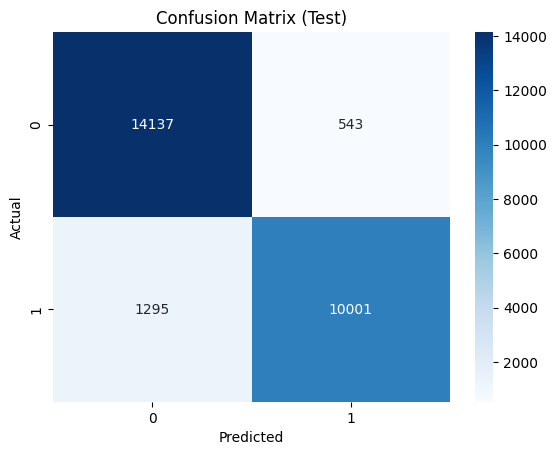

{'Logistic_Regression': [0.8732291345857714,
  0.8660689781355777,
  0.8380842776203966,
  0.8518468529266208,
  0.9269176870981313],
 'Decision_Tree': [0.9442947336002464,
  0.9346041832141911,
  0.9375,
  0.9360498519467892,
  0.9435115803814713],
 'Random_Forest': [0.9618493994456422,
  0.9729233593391464,
  0.9383852691218131,
  0.9553422558694966,
  0.9939368653561145],
 'Gradient_Boosting': [0.939752078842008,
  0.940675663436283,
  0.9194405099150141,
  0.9299368760352777,
  0.9873320370693781],
 'KNN_Model': [0.929242377579304,
  0.9485015174506829,
  0.8853576487252125,
  0.9158424908424908,
  0.9701311947128931]}

In [49]:
# Model Initialization
KNN_Model = KNeighborsClassifier()

# Train the model
KNN_Model.fit(x_train_scaled, y_train)

Results['KNN_Model'] = model_evaluation(KNN_Model)
Results

### 6. XGBoost

In [50]:
# Importing the model
from xgboost import XGBClassifier

<---------------Accuracy Score------------------->
Training Accuracy:: 0.98
Testing Accuracy:: 0.96

<-------------------Classification Metrix---------------------->
Precision: 0.97
Recall: 0.94
F1 Score: 0.96
ROC-AUC Score: 0.99

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[14357   323]
 [  666 10630]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14680
           1       0.97      0.94      0.96     11296

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



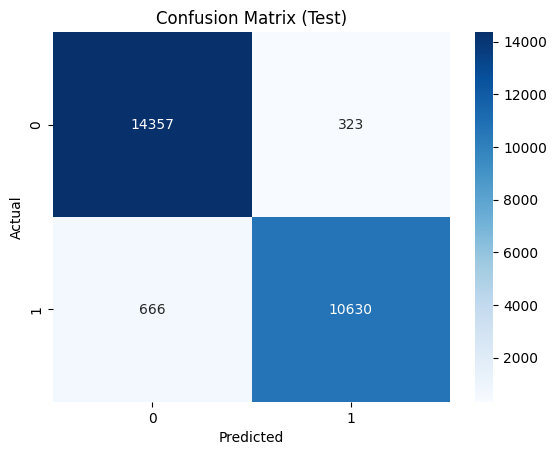

{'Logistic_Regression': [0.8732291345857714,
  0.8660689781355777,
  0.8380842776203966,
  0.8518468529266208,
  0.9269176870981313],
 'Decision_Tree': [0.9442947336002464,
  0.9346041832141911,
  0.9375,
  0.9360498519467892,
  0.9435115803814713],
 'Random_Forest': [0.9618493994456422,
  0.9729233593391464,
  0.9383852691218131,
  0.9553422558694966,
  0.9939368653561145],
 'Gradient_Boosting': [0.939752078842008,
  0.940675663436283,
  0.9194405099150141,
  0.9299368760352777,
  0.9873320370693781],
 'KNN_Model': [0.929242377579304,
  0.9485015174506829,
  0.8853576487252125,
  0.9158424908424908,
  0.9701311947128931],
 'XGBoost': [0.9619263935940868,
  0.9705103624577741,
  0.9410410764872521,
  0.9555485639804037,
  0.9948456230557848]}

In [51]:
# Initialize the XGBoost classifier
XG_model = XGBClassifier(random_state=12, verbosity=0)

# Train the model
XG_model.fit(x_train_scaled, y_train)

Results['XGBoost'] = model_evaluation(XG_model)
Results

#### 7.SVM (Support Vector Machine) 

In [52]:
# Importing the SVM Model
from sklearn.svm import SVC

<---------------Accuracy Score------------------->
Training Accuracy:: 0.96
Testing Accuracy:: 0.95

<-------------------Classification Metrix---------------------->
Precision: 0.96
Recall: 0.94
F1 Score: 0.95
ROC-AUC Score: 0.99

<-------------------Confusion Matrix---------------------->

Confusion Matrix:
 [[14225   455]
 [  729 10567]]

<-------------------Classification Report---------------------->

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14680
           1       0.96      0.94      0.95     11296

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



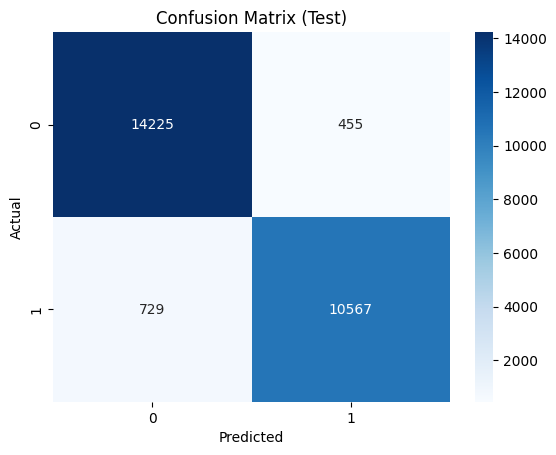

{'Logistic_Regression': [0.8732291345857714,
  0.8660689781355777,
  0.8380842776203966,
  0.8518468529266208,
  0.9269176870981313],
 'Decision_Tree': [0.9442947336002464,
  0.9346041832141911,
  0.9375,
  0.9360498519467892,
  0.9435115803814713],
 'Random_Forest': [0.9618493994456422,
  0.9729233593391464,
  0.9383852691218131,
  0.9553422558694966,
  0.9939368653561145],
 'Gradient_Boosting': [0.939752078842008,
  0.940675663436283,
  0.9194405099150141,
  0.9299368760352777,
  0.9873320370693781],
 'KNN_Model': [0.929242377579304,
  0.9485015174506829,
  0.8853576487252125,
  0.9158424908424908,
  0.9701311947128931],
 'XGBoost': [0.9619263935940868,
  0.9705103624577741,
  0.9410410764872521,
  0.9555485639804037,
  0.9948456230557848],
 'SVM': [0.9544194641207269,
  0.958718925784794,
  0.93546388101983,
  0.9469486513128417,
  0.9888729028529304]}

In [53]:
# Intializing the model
svm_model = SVC(random_state=12, probability=True)

# Train the model
svm_model.fit(x_train_scaled, y_train)

Results['SVM'] = model_evaluation(svm_model)
Results

In [54]:
Columns = ['Accuracy','Precision', 'Recall', 'F1 Score', 'ROC AUC']
pd.DataFrame(Results, index=Columns).T

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic_Regression,0.873229,0.866069,0.838084,0.851847,0.926918
Decision_Tree,0.944295,0.934604,0.937500,0.936050,0.943512
Random_Forest,0.961849,0.972923,0.938385,0.955342,0.993937
Gradient_Boosting,0.939752,0.940676,0.919441,0.929937,0.987332
KNN_Model,0.929242,0.948502,0.885358,0.915842,0.970131
XGBoost,0.961926,0.970510,0.941041,0.955549,0.994846
SVM,0.954419,0.958719,0.935464,0.946949,0.988873


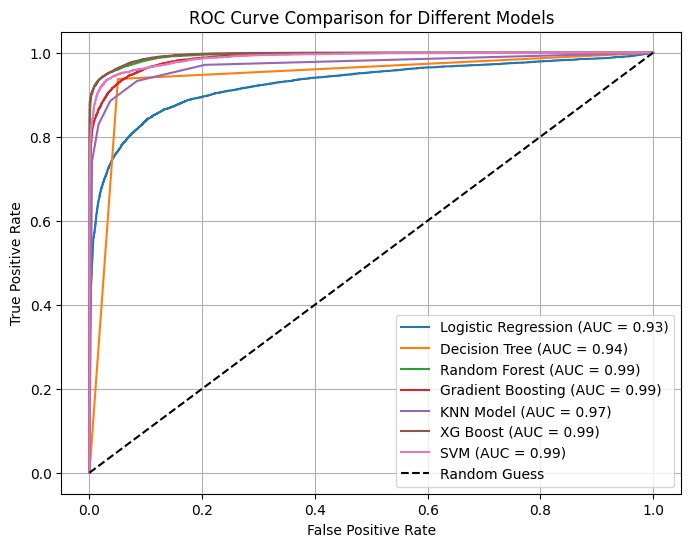

In [55]:
# Initialize models
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": DT_model,
    "Random Forest": RF_model,
    "Gradient Boosting": GB_model,
    "KNN Model": KNN_Model,
    "XG Boost": XG_model,
    "SVM": svm_model
}

plt.figure(figsize=(8, 6))

# Loop through models and plot ROC curve
for name, model in models.items():
    # model.fit(x_train, y_train)
    y_probs = model.predict_proba(x_test_scaled)[:, 1]  # Get probability estimates
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for Different Models")
plt.legend()
plt.grid()
plt.show()

## Model Selection & Final Model
<hr />

__Conclusion on Airline Passenger Data Model Selection__

Based on the performance metrics — accuracy, precision, recall, F1 score, and ROC AUC — the XGBoost and Random Forest models emerge as the top performers among the evaluated models.

__Key Observations:__

__XGBoost__ achieved the highest overall performance:

__Accuracy:__ 0.9619

__Precision:__ 0.9705

__Recall:__ 0.9410

__F1 Score:__ 0.9555

__ROC AUC:__ 0.9948 (highest among all models)

Balanced across all metrics, indicating strong predictive power and generalization.

__Random Forest__ is a close contender:

Slightly better __precision__ than XGBoost but slightly lower __recall__.

Excellent ROC AUC of 0.9939.

__SVM__ and __Gradient Boosting__ also performed well:

Both achieved F1 scores > 0.94 and ROC AUC > 0.98.

Slightly lower recall and F1 than __XGBoost__ and __Random Forest__.

KNN and Logistic Regression show comparatively lower recall and F1 scores:

While KNN has high precision (0.9485), its recall (0.8854) is lower.

Logistic Regression has the lowest performance across all metrics.

Decision Tree is strong, but slightly behind ensemble methods:

Simpler model with high accuracy and decent F1 (0.9360), but less robust than __XGBoost/Random Forest.__

__Final Recommendation:__
XGBoost is the best choice for this classification task due to its consistently high performance across all metrics, particularly in balancing precision and recall, and achieving the highest ROC AUC, indicating excellent classification capability.

<h3 align="center">Thank You</h3>